In [1]:
# import system libs 
import os
import time
import glob
import shutil
import pathlib
import itertools
from PIL import Image


# import data handling tools
import cv2
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from keras.preprocessing.image import load_img, img_to_array


# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")

print ('modules loaded')

2024-04-16 01:05:54.014333: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/Users/saxyrinchen/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


modules loaded


In [13]:
data = keras.utils.image_dataset_from_directory(
    directory='../data/Faces',
    labels='inferred',
    label_mode='categorical',
    batch_size=140,
    image_size=(1000, 1000),
)

image_count = len(list(data))

Found 140 files belonging to 6 classes.


2024-04-16 00:34:10.573433: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


#### 1. Random Rotation

We use PIL and NumPy to load and convert the image to a NumPy array. Then we specify the maximum rotation in the ImageDataGenerator API using the “rotation_range” argument.

Then we create an iteration object “aug_iter” by specifying the batch size = 1 because we only have 1 image (our sample image). Doing this will get a newly transformed image whenever we trigger the iteration object.

Then we simply display 6 transformed images in a 2 x 3 grid using Matplotlib.

In [ ]:
base_path = '../data/Faces/'

categories = ['Angry', 'Fear', 'Happy', 'Neutral', 'Sad']

max_rot = 60

datagen = ImageDataGenerator(rotation_range=max_rot, fill_mode='nearest')

for category in categories:
    cat_path = os.path.join(base_path, category)
    
    images = [img for img in os.listdir(cat_path) if img.lower().endswith(('.png', '.jpg', '.jpeg'))]
    
    for img_name in images:
        img_path = os.path.join(cat_path, img_name)
        
        img = Image.open(img_path)
        img = np.asarray(img)
        img = np.expand_dims(img, axis=0)
        
        aug_iter = datagen.flow(img, batch_size=1)
        
        fig, ax = plt.subplots(nrows=1, ncols=6, figsize=(17,3))  # Adjust figure size as needed
        
        for i in range(6):
            image = next(aug_iter)[0].astype('uint8')
            
            ax[i].imshow(image)
            ax[i].axis('off')
        
        # Display the figure with the original and augmented images
        plt.show()
        
        # save the augmented images to disk
        # for i, image in enumerate(aug_iter):
        #     save_img_path = f"{cat_path}/augmented_{i}_{img_name}"
        #     Image.fromarray(image[0].astype('uint8')).save(save_img_path)
        #     if i >= 5:  # Save 6 images and then break
        #         break


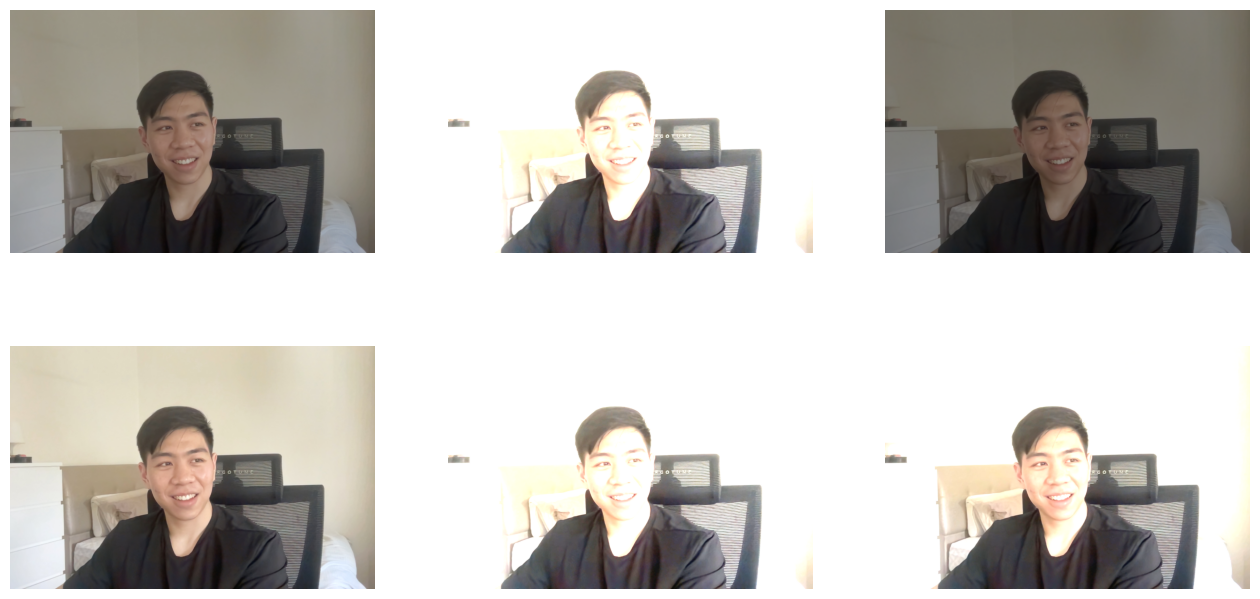

In [10]:
img_path = '../data/Faces/Happy/daniel_3.jpg'

# ImageDataGenerator rotation
datagen = ImageDataGenerator(brightness_range=[0.4,1.9], fill_mode='nearest')

# Load Image
img = Image.open(img_path)
img = np.asarray(img)
img = np.expand_dims(img, axis=0)

# iterator
aug_iter = datagen.flow(img, batch_size=1)

# generate samples and plot
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(16,8))
axs = ax.reshape(1,-1)[0]

# generate batch of images
for i in range(6):

  # convert to unsigned integers
  image = next(aug_iter)[0].astype('uint8')
 
  # plot image
  axs[i].imshow(image)
  axs[i].axis('off')

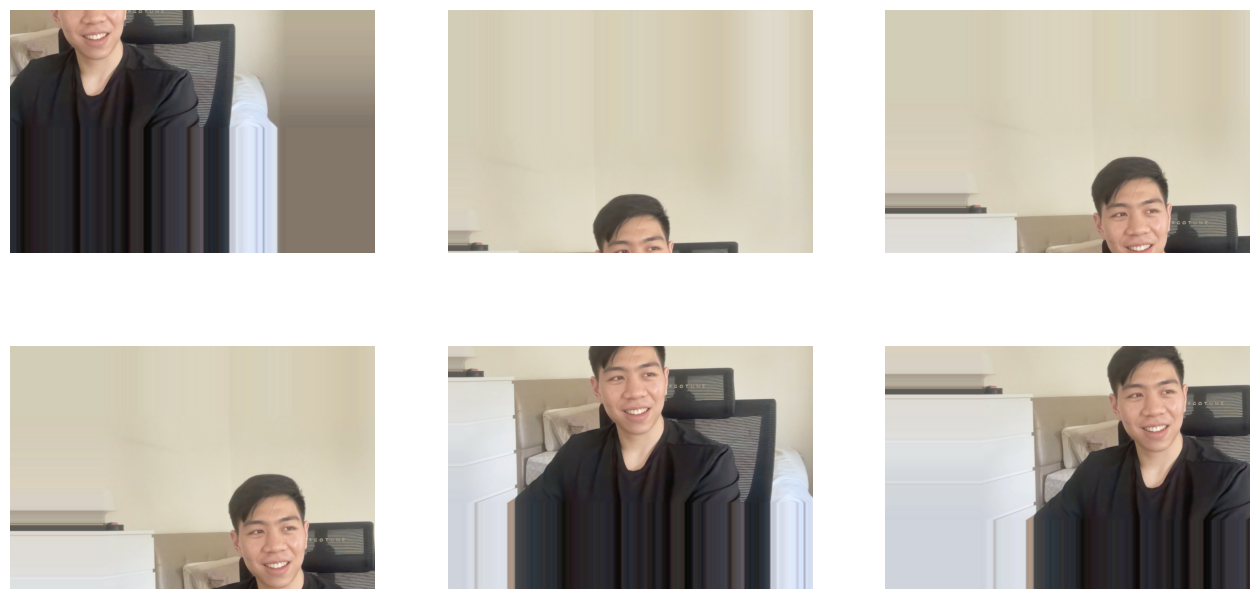

In [11]:
img_path = '../data/Faces/Happy/daniel_3.jpg'

# ImageDataGenerator rotation
datagen = ImageDataGenerator(width_shift_range=0.45, height_shift_range=0.45)

# Load Image
img = Image.open(img_path)
img = np.asarray(img)
img = np.expand_dims(img, axis=0)

# iterator
aug_iter = datagen.flow(img, batch_size=1)

# generate samples and plot
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(16,8))
axs = ax.reshape(1,-1)[0]

# generate batch of images
for i in range(6):

  # convert to unsigned integers
  image = next(aug_iter)[0].astype('uint8')
 
  # plot image
  axs[i].imshow(image)
  axs[i].axis('off')

In [6]:
from imgaug import augmenters as iaa
import imageio
import numpy as np

# Load an image
image = imageio.imread('../../Dataset (Raw)/Fear/daniel_1.jpg')

# Define an augmentation sequence
seq = iaa.Sequential([
    iaa.Fliplr(0.5),  # horizontal flips
    iaa.Crop(percent=(0, 0.1)),  # random crops
    iaa.LinearContrast((0.75, 1.5)),  # contrast adjustment
    iaa.AdditiveGaussianNoise(scale=(10, 60)),  # Gaussian noise
    iaa.Affine(
        scale={"x": (0.8, 1.2), "y": (0.8, 1.2)},
        translate_percent={"x": (-0.2, 0.2), "y": (-0.2, 0.2)},
        rotate=(-25, 25)
    )  # scale, translate, rotate
])

# Apply augmentations
augmented_image = seq(images=[image])

# Save or display augmented image
imageio.imwrite('../../Dataset (Raw)/Fear/daniel_1.jpg', augmented_image[0])


In [13]:
import os
import imageio
from imgaug import augmenters as iaa

def load_images_from_folder(folder):
    """Load all images in a folder."""
    images = []
    filenames = []
    for filename in os.listdir(folder):
        if filename.endswith(('.png', '.jpg', '.jpeg')):  # Add other file types if necessary.
            img = imageio.imread(os.path.join(folder, filename))
            if img is not None:
                images.append(img)
                filenames.append(filename)
    return images, filenames

def augment_images(images, save_path, filenames):
    """Apply augmentations and save the images."""
    # Define your augmentation pipeline
    seq = iaa.Sequential([
        iaa.Fliplr(0.5),  # horizontal flips
        iaa.Crop(percent=(0, 0.1)),  # random crops
        iaa.LinearContrast((0.75, 1.5)),  # contrast adjustment
        iaa.AdditiveGaussianNoise(scale=(10, 60)),  # Gaussian noise
        iaa.Affine(
            scale={"x": (0.8, 1.2), "y": (0.8, 1.2)},
            translate_percent={"x": (-0.2, 0.2), "y": (-0.2, 0.2)},
            rotate=(-25, 25)
        )  # scale, translate, rotate
    ])

    
    augmented_images = seq(images=images) # applies augmentation
    # print(augmented_images)
    for img, filename in zip(augmented_images, filenames):
        imageio.imwrite(os.path.join(save_path, filename), img)

def process_subfolders(input_folder, output_folder):
    """Process each subfolder in the dataset."""
    for expression in os.listdir(input_folder):
        subfolder_path = os.path.join(input_folder, expression)
        if os.path.isdir(subfolder_path):
            output_subfolder = os.path.join(output_folder, expression)
            if not os.path.exists(output_subfolder):
                os.makedirs(output_subfolder)
            images, filenames = load_images_from_folder(subfolder_path)
            augment_images(images, output_subfolder, filenames)


input_folder = '../data/Faces'  # raw webcam images
output_folder = '../data/Faces (Augmented)'  # new folder for augmented images

if not os.path.exists(output_folder):
    os.makedirs(output_folder)

process_subfolders(input_folder, output_folder)
# augment_images(images, output_folder, filenames)

# Output information
"Images loaded and augmented successfully, saved in:", output_folder

[array([[[217, 202, 192],
        [223, 208, 198],
        [213, 198, 188],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[211, 196, 186],
        [206, 191, 181],
        [217, 202, 192],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[229, 214, 204],
        [221, 206, 196],
        [225, 210, 200],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       ...,

       [[206, 192, 175],
        [188, 174, 157],
        [184, 170, 154],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[204, 190, 173],
        [201, 187, 170],
        [179, 165, 148],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[194, 180, 163],
        [206, 192, 175],
        [192, 178, 162],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]

('Images loaded and augmented successfully, saved in:',
 '../data/Faces (Augmented)')